In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: murali5695
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri


100%|██████████| 86.8M/86.8M [00:02<00:00, 31.4MB/s]


In [ ]:
%cd /content/gdrive/MyDrive/1000/ANN Models
!ls

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/1000/ANN Models'
/content
brain-tumor-classification-mri	drive  sample_data


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import pickle
import time
import numpy as np
import keras.optimizers
from sklearn.metrics import classification_report
import cv2
import os
import tensorflow as tf
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.17.0


In [ ]:
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/brain-tumor-classification-mri/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/brain-tumor-classification-mri/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train, random_state = 101)
X_train.shape

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 101)

In [ ]:
Y_train_new = []
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train=Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

Y_test_new = []
for i in Y_test:
    Y_test_new.append(labels.index(i))
Y_test=Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)



In [ ]:
print(X_train.shape)
print(X_test.shape)

(2611, 150, 150, 3)
(653, 150, 150, 3)


improved-model-1728883408


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.4276 - loss: 1.3921 - val_accuracy: 0.2052 - val_loss: 2.5329
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5840 - loss: 0.9763 - val_accuracy: 0.6064 - val_loss: 0.9444
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6543 - loss: 0.8275 - val_accuracy: 0.7106 - val_loss: 0.7541
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6903 - loss: 0.7302 - val_accuracy: 0.6937 - val_loss: 0.7155
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7502 - loss: 0.6594 - val_accuracy: 0.6769 - val_loss: 0.7517
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8171 - loss: 0.5326 - val_accuracy: 0.7412 - val_loss: 0.6035
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8231 - loss: 0.4676 - val_accuracy: 0.7703 - val_loss: 0.6053
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8380 - loss: 0.4459 - val_accuracy: 0.6784 - val_los

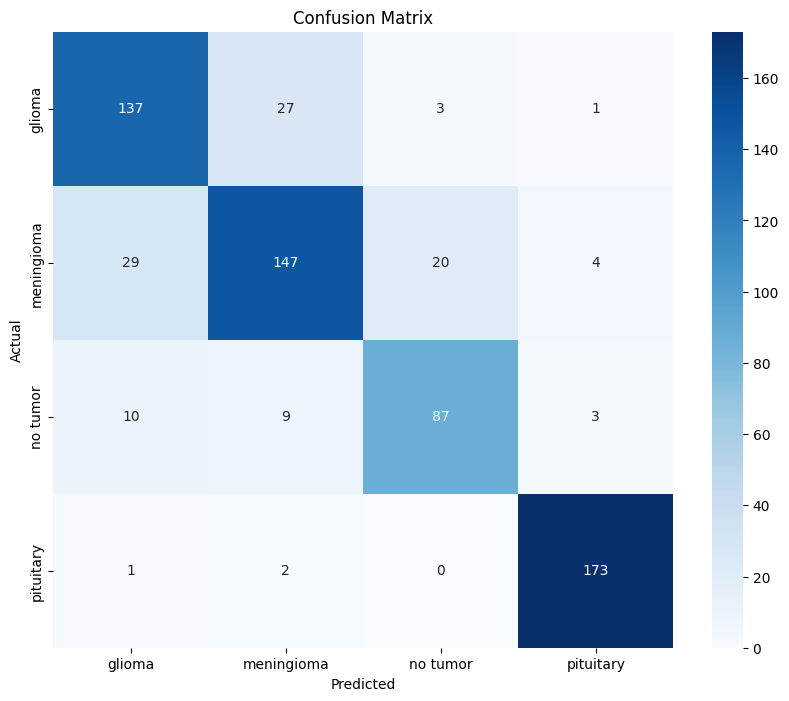

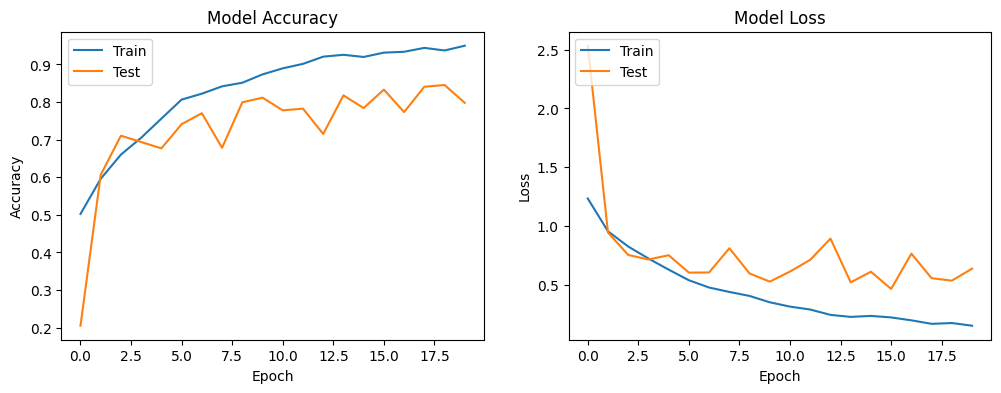

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

NAME = "improved-model-{}".format(int(time.time()))
print(NAME)

model = Sequential()

model.add(Flatten(input_shape=X_train.shape[1:]))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Output layer (4 classes)
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

history = model.fit(X_train, Y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(X_test, Y_test),
                    callbacks=[tensorboard, es])

scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

model.save("{}-model-{}-accuracy.keras".format(NAME, scores[1]))

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(Y_test, axis=1), y_pred_bool))

cm = confusion_matrix(np.argmax(Y_test, axis=1), y_pred_bool)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['glioma', 'meningioma', 'no tumor', 'pituitary'],
            yticklabels=['glioma', 'meningioma', 'no tumor', 'pituitary'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

plot_training_history(history)


In [ ]:
cd /content/drive/MyDrive/1000

/content/drive/MyDrive/1000


In [ ]:

model.save('ann model83.h5')


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score



accuracy = accuracy_score(np.argmax(Y_test, axis=1), y_pred_bool)
precision = precision_score(np.argmax(Y_test, axis=1), y_pred_bool, average='weighted')
recall = recall_score(np.argmax(Y_test, axis=1), y_pred_bool, average='weighted')
f1 = f1_score(np.argmax(Y_test, axis=1), y_pred_bool, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

print("\nClassification Report:")
print(classification_report(np.argmax(Y_test, axis=1), y_pred_bool))

report = classification_report(np.argmax(Y_test, axis=1), y_pred_bool, output_dict=True)
print("\nF1-score for each class:")
target_names = ['glioma', 'meningioma', 'no tumor', 'pituitary']
for i, label in enumerate(target_names):
    print(f"{label}: {report[str(i)]['f1-score']}")

Accuracy: 0.8330781010719756
Precision: 0.8321330820953026
Recall: 0.8330781010719756
F1-Score: 0.8320568609833795

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       168
           1       0.79      0.73      0.76       200
           2       0.79      0.80      0.79       109
           3       0.96      0.98      0.97       176

    accuracy                           0.83       653
   macro avg       0.83      0.83      0.83       653
weighted avg       0.83      0.83      0.83       653


F1-score for each class:
glioma: 0.7942028985507247
meningioma: 0.7636363636363637
no tumor: 0.7945205479452054
pituitary: 0.969187675070028
